In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 2.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import logging

In [0]:
logger=tf.get_logger()

In [0]:
logger.setLevel(logging.ERROR)

In [0]:
tfds.disable_progress_bar(
    
)

In [8]:
dataset,metadata = tfds.load("fashion_mnist" , as_supervised=True , with_info=True)
train_dataset , test_dataset = dataset['train'] , dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6XSAKE/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6XSAKE/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
def normalize(images , label):
  images = tf.cast(images , tf.float32)
  images /= 255
  return images , label

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset= test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [0]:
num_exmp_train = 60000
num_exmp_test = 10000

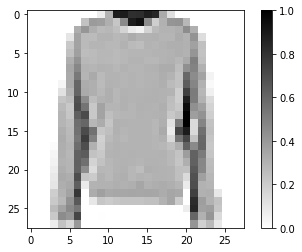

In [25]:
import matplotlib.pyplot as plt

for images,label in train_dataset.take(1):
  break
images = images.numpy().reshape((28,28))  
plt.figure()
plt.imshow( images , cmap = plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.show()

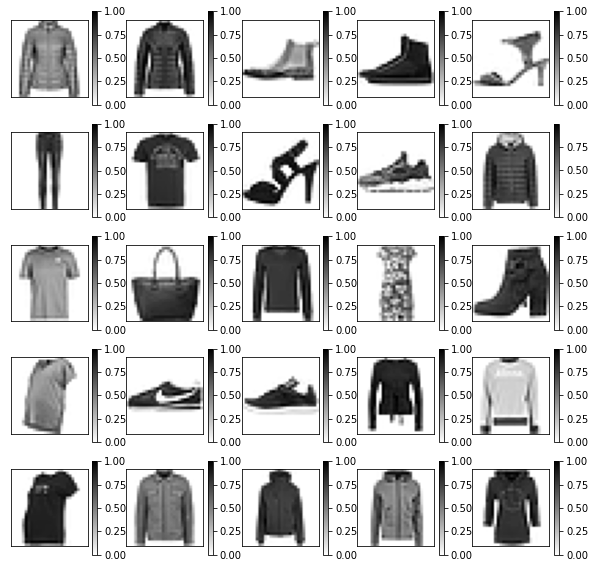

In [26]:
plt.figure(figsize=(10,10))
i=0
for images,label in test_dataset.take(25):
  images=images.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(images , cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.colorbar()
  i=i+1
plt.show()  


In [0]:
model =  tf.keras.Sequential([
                              tf.keras.layers.Conv2D( 32 , (3,3) , padding='same' , activation = tf.nn.relu , input_shape = (28,28,1)),
                              tf.keras.layers.MaxPool2D((2,2) , strides=2),
                              tf.keras.layers.Conv2D(64 , (3,3),padding='same' , activation=tf.nn.relu),
                              tf.keras.layers.MaxPool2D((2,2) , strides = 2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128 , activation = tf.nn.relu),
                              tf.keras.layers.Dense(10)

])

In [0]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
batch = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(32)
test_dataset=test_dataset.cache().batch(32)

In [31]:
model.fit(train_dataset , epochs = 7 , steps_per_epoch= 60000/32)

Epoch 1/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3933 - accuracy: 0.8579
Epoch 2/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2560 - accuracy: 0.9062
Epoch 3/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2118 - accuracy: 0.9225
Epoch 4/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1829 - accuracy: 0.9329
Epoch 5/7
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1520 - accuracy: 0.9430
Epoch 6/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1325 - accuracy: 0.9509
Epoch 7/7
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1089 - accuracy: 0.9599


In [33]:
train_loss , train_accuracy = model.evaluate(test_dataset , steps = 10000/32)
print(train_accuracy)

313/312 [==============================] - 4s 12ms/step - loss: 0.2701 - accuracy: 0.9196
0.9196000099182129


<h1>BINGO!